In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf


In [ ]:
pd.set_option("display.max_rows",None)

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df_final_2 = pd.read_csv("/Users/damianzeller/Downloads/df_final_2.csv")

In [6]:
df_final_2

,Unnamed: 0,Company,IPO_Status,Mean_Sentiment_Score,Num_Articles,IPO_Date,IPO_Date.1,IPO_Date +30,IPO_Ticker,PE/VC_backing,Underwriter_Rating,Age at IPO,Log_IPO_Issue_Size,FTSE_100_IVI,Market_Performance,Technology_Dummy,Healthcare_Dummy,Financials_Dummy,Energy_Utilities_Dummy,Basic_Materials_Dummy,Industrials_Dummy,Consumer_Dummy,RealEstate_Dummy,Founder_Control_dummy,High_Concentration_Dummy,Strategic_Ownership_Dummy,Article_Count,First_Day_Performance,First_Month_performance,IPO_Issue_Size_Clean,Log_of_Age,Mean_Sentiment_Score_standard,Num_Articles_log
0,0,4BASEBIO_PLC,Post-IPO,0.587443,25,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,1,£16.49,16.36,0.0064,0,1,0,0,0,0,0,0,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-0.038617,3.218876
1,1,4BASEBIO_PLC,Pre-IPO,0.347777,9,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,1,£16.49,16.36,0.0064,0,1,0,0,0,0,0,0,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-1.483719,2.197225
2,2,4GLOBAL_PLC,Post-IPO,0.205803,28,2021-12-07,2021-12-07,2022-01-06,4GBL.L,0,3,19,£15.11,17.24,0.0228,1,0,0,0,0,0,0,0,0,0,0,39,0.223684,-0.120430,15.11,2.944439,-2.339774,3.332205
3,3,4GLOBAL_PLC,Pre-IPO,0.643039,10,2021-12-07,2021-12-07,2022-01-06,4GBL.L,0,3,19,£15.11,17.24,0.0228,1,0,0,0,0,0,0,0,0,0,0,39,0.223684,-0.120430,15.11,2.944439,0.296613,2.302585
4,4,ABERFORTH_GEARED_VALUE_INCOME_TRUST_PLC,Post-IPO,0.996628,67,2024-07-01,2024-07-01,2024-07-31,AGVI.L,0,1,1,£18.90,20.33,-0.0274,0,0,1,0,0,0,0,0,0,1,1,78,0.000000,-0.148649,18.90,0.000000,2.428634,4.204693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,301,WINDWARD_LTD,Pre-IPO,0.569104,67,2021-12-06,2021-12-06,2022-01-05,WNWD.L,1,2,11,£17.36,17.26,0.0241,1,0,0,0,0,0,0,0,0,0,0,86,0.235795,0.200000,17.36,2.397895,-0.149191,4.204693
289,302,WISE_PLC,Post-IPO,0.712091,76,2021-07-07,2021-07-07,2021-08-06,WISEa.L,1,1,10,£18.20,16.16,-0.0028,0,0,0,0,0,1,0,0,1,1,0,92,0.016234,-0.252396,18.20,2.302585,0.712972,4.330733
290,303,WISE_PLC,Pre-IPO,0.734974,15,2021-07-07,2021-07-07,2021-08-06,WISEa.L,1,1,10,£18.20,16.16,-0.0028,0,0,0,0,0,1,0,0,1,1,0,92,0.016234,-0.252396,18.20,2.302585,0.850947,2.708050
291,304,ZENOVA_GROUP_PLC,Post-IPO,0.422303,10,2021-07-22,2021-07-22,2021-08-21,ZED.L,0,3,1,£15.32,16.16,-0.0028,0,0,0,0,0,1,0,0,0,0,0,11,0.070039,-0.047273,15.32,0.000000,-1.034351,2.302585


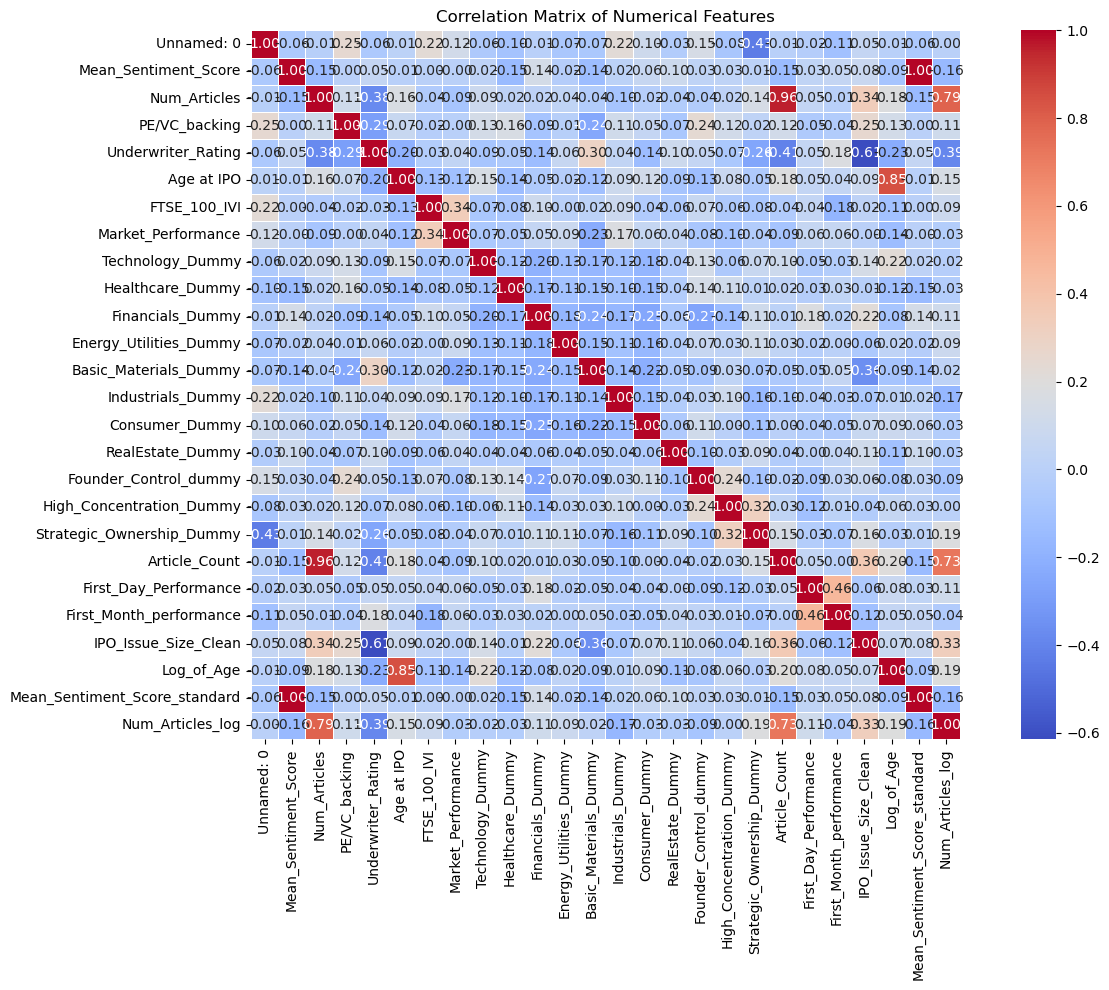

In [7]:
# Compute correlation matrix for numeric columns
corr_matrix = df_final_2.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title and layout
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## First Regression on First Day Perfromance


In [8]:
pre_ipo_df = df_final_2[df_final_2["IPO_Status"] == "Pre-IPO"].copy()

In [ ]:
#pre_ipo_df["Moderation_Age"] = pre_ipo_df['Log_of_Age'] * pre_ipo_df['Mean_Sentiment_Score_standard']
#pre_ipo_df["Moderation_UR"] = pre_ipo_df['Underwriter_Rating'] * pre_ipo_df['Mean_Sentiment_Score_standard']
#pre_ipo_df["Moderation_PEVC"] = pre_ipo_df['PE/VC_backing'] * pre_ipo_df['Mean_Sentiment_Score_standard']
#pre_ipo_df["Moderation_Issue"] = pre_ipo_df['IPO_Issue_Size_Clean'] * pre_ipo_df['Mean_Sentiment_Score_standard']

In [10]:
pre_ipo_df

,Unnamed: 0,Company,IPO_Status,Mean_Sentiment_Score,Num_Articles,IPO_Date,IPO_Date.1,IPO_Date +30,IPO_Ticker,PE/VC_backing,Underwriter_Rating,Age at IPO,Log_IPO_Issue_Size,FTSE_100_IVI,Market_Performance,Technology_Dummy,Healthcare_Dummy,Financials_Dummy,Energy_Utilities_Dummy,Basic_Materials_Dummy,Industrials_Dummy,Consumer_Dummy,RealEstate_Dummy,Founder_Control_dummy,High_Concentration_Dummy,Strategic_Ownership_Dummy,Article_Count,First_Day_Performance,First_Month_performance,IPO_Issue_Size_Clean,Log_of_Age,Mean_Sentiment_Score_standard,Num_Articles_log
1,1,4BASEBIO_PLC,Pre-IPO,0.347777,9,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,1,£16.49,16.36,0.0064,0,1,0,0,0,0,0,0,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-1.483719,2.197225
3,3,4GLOBAL_PLC,Pre-IPO,0.643039,10,2021-12-07,2021-12-07,2022-01-06,4GBL.L,0,3,19,£15.11,17.24,0.0228,1,0,0,0,0,0,0,0,0,0,0,39,0.223684,-0.120430,15.11,2.944439,0.296613,2.302585
5,5,ABERFORTH_GEARED_VALUE_INCOME_TRUST_PLC,Pre-IPO,1.012616,11,2024-07-01,2024-07-01,2024-07-31,AGVI.L,0,1,1,£18.90,20.33,-0.0274,0,0,1,0,0,0,0,0,0,1,1,78,0.000000,-0.148649,18.90,0.000000,2.525038,2.397895
7,7,ACTIVEOPS_PLC,Pre-IPO,0.604476,7,2021-03-29,2021-03-29,2021-04-28,AOM.L,1,2,40,£18.14,13.15,-0.0426,1,0,0,0,0,0,0,0,0,0,0,17,0.200000,-0.083333,18.14,3.688879,0.064091,1.945910
9,9,AIR_ASTANA_JOINT_STOCK_COMPANY,Pre-IPO,0.242756,128,2024-02-09,2024-02-09,2024-03-10,AIRAq.L,0,1,23,£14.11,14.24,0.0385,0,0,0,0,0,0,1,0,0,1,1,358,0.125000,-0.066667,14.11,3.135494,-2.116961,4.852030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,295,VIRGIN_WINES_UK_PLC,Pre-IPO,0.779869,64,2021-03-02,2021-03-02,2021-04-01,VINO.L,1,2,21,£17.69,20.60,0.0253,0,0,0,0,0,0,1,0,1,1,0,113,-0.010000,-0.176768,17.69,3.044522,1.121647,4.158883
286,297,WAG_PAYMENT_SOLUTIONS_PLC,Pre-IPO,0.519744,26,2021-10-08,2021-10-08,2021-11-07,WPS.L,1,1,20,£19.04,20.60,0.0253,0,0,0,0,0,1,0,0,1,1,0,68,-0.082568,-0.129714,19.04,2.995732,-0.446818,3.258097
288,301,WINDWARD_LTD,Pre-IPO,0.569104,67,2021-12-06,2021-12-06,2022-01-05,WNWD.L,1,2,11,£17.36,17.26,0.0241,1,0,0,0,0,0,0,0,0,0,0,86,0.235795,0.200000,17.36,2.397895,-0.149191,4.204693
290,303,WISE_PLC,Pre-IPO,0.734974,15,2021-07-07,2021-07-07,2021-08-06,WISEa.L,1,1,10,£18.20,16.16,-0.0028,0,0,0,0,0,1,0,0,1,1,0,92,0.016234,-0.252396,18.20,2.302585,0.850947,2.708050


In [12]:
summary_pre_ipo_df = pd.DataFrame({
    'Data Type': pre_ipo_df.dtypes,
    'Non-Null Count': pre_ipo_df.count(),
    'Null Count': pre_ipo_df.isna().sum(),
    'Unique Values': pre_ipo_df.nunique(),
    #'Sample Values': df_result.apply(lambda x: x.unique()[:5])  # small peek into values
})
print(summary_pre_ipo_df)

                              Data Type  Non-Null Count  Null Count  \
Unnamed: 0                        int64             143           0   
Company                          object             143           0   
IPO_Status                       object             143           0   
Mean_Sentiment_Score            float64             143           0   
Num_Articles                      int64             143           0   
IPO_Date                         object             143           0   
IPO_Date.1                       object             143           0   
IPO_Date +30                     object             143           0   
IPO_Ticker                       object             143           0   
PE/VC_backing                     int64             143           0   
Underwriter_Rating                int64             143           0   
Age at IPO                        int64             143           0   
Log_IPO_Issue_Size               object             143           0   
FTSE_1

In [13]:
q1=pre_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean",
                "FTSE_100_IVI",
                "Num_Articles_log","First_Day_Performance"]].quantile(0.25)

q3=pre_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean",
                "FTSE_100_IVI",
                "Num_Articles_log","First_Day_Performance"]].quantile(0.75)

IQR= q3-q1

In [14]:
df_numeric=pre_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean",
                "FTSE_100_IVI",
                "Num_Articles_log","First_Day_Performance"]]

In [15]:
mask = ~((df_numeric < (q1 - 1.5 * IQR)) | (df_numeric > (q3 + 1.5 * IQR))).any(axis=1)

In [24]:
pre_ipo_df=pre_ipo_df[mask].reset_index(drop=True)

In [17]:
summary_pre_ipo_df = pd.DataFrame({
    'Data Type': pre_ipo_df_test.dtypes,
    'Non-Null Count': pre_ipo_df_test.count(),
    'Null Count': pre_ipo_df_test.isna().sum(),
    'Unique Values': pre_ipo_df_test.nunique(),
    #'Sample Values': df_result.apply(lambda x: x.unique()[:5])  # small peek into values
})
print(summary_pre_ipo_df)

                              Data Type  Non-Null Count  Null Count  \
Unnamed: 0                        int64             120           0   
Company                          object             120           0   
IPO_Status                       object             120           0   
Mean_Sentiment_Score            float64             120           0   
Num_Articles                      int64             120           0   
IPO_Date                         object             120           0   
IPO_Date.1                       object             120           0   
IPO_Date +30                     object             120           0   
IPO_Ticker                       object             120           0   
PE/VC_backing                     int64             120           0   
Underwriter_Rating                int64             120           0   
Age at IPO                        int64             120           0   
Log_IPO_Issue_Size               object             120           0   
FTSE_1

In [25]:
pre_ipo_df.rename(columns={'PE/VC_backing': 'PE_VC_backing'}, inplace=True)

In [26]:
pre_ipo_df["PE_VC_backing_centered"]=pre_ipo_df["PE_VC_backing"]-pre_ipo_df["PE_VC_backing"].mean()
pre_ipo_df["Log_of_Age_centered"]=pre_ipo_df["Log_of_Age"]-pre_ipo_df["Log_of_Age"].mean()
pre_ipo_df["IPO_Issue_Size_Clean_centered"]=pre_ipo_df["IPO_Issue_Size_Clean"]-pre_ipo_df["IPO_Issue_Size_Clean"].mean()
pre_ipo_df["Underwriter_Rating_centered"]=pre_ipo_df["Underwriter_Rating"]-pre_ipo_df["Underwriter_Rating"].mean()
pre_ipo_df["Mean_Sentiment_Score_standard_centered"]=pre_ipo_df["Mean_Sentiment_Score_standard"]-pre_ipo_df["Mean_Sentiment_Score_standard"].mean()

In [31]:
#model = sm.OLS(y, X).fit()
model = smf.ols('First_Day_Performance ~ Mean_Sentiment_Score_standard_centered + PE_VC_backing_centered + Underwriter_Rating_centered + Log_of_Age_centered + IPO_Issue_Size_Clean_centered + FTSE_100_IVI + Technology_Dummy + Healthcare_Dummy + Energy_Utilities_Dummy + Basic_Materials_Dummy + Industrials_Dummy + Consumer_Dummy + RealEstate_Dummy + Founder_Control_dummy + High_Concentration_Dummy + Strategic_Ownership_Dummy + Num_Articles_log + Log_of_Age_centered:Mean_Sentiment_Score_standard_centered + Mean_Sentiment_Score_standard_centered:Underwriter_Rating_centered + PE_VC_backing_centered:Mean_Sentiment_Score_standard_centered + Mean_Sentiment_Score_standard_centered:IPO_Issue_Size_Clean_centered', data=pre_ipo_df).fit()

In [32]:
# Print the summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     First_Day_Performance   R-squared:                       0.197
Model:                               OLS   Adj. R-squared:                  0.024
Method:                    Least Squares   F-statistic:                     1.142
Date:                   Wed, 04 Jun 2025   Prob (F-statistic):              0.320
Time:                           12:21:12   Log-Likelihood:                 97.699
No. Observations:                    120   AIC:                            -151.4
Df Residuals:                         98   BIC:                            -90.07
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [33]:
robust_model = model.get_robustcov_results(cov_type='HC3')
print(robust_model.summary())

                              OLS Regression Results                             
Dep. Variable:     First_Day_Performance   R-squared:                       0.197
Model:                               OLS   Adj. R-squared:                  0.024
Method:                    Least Squares   F-statistic:                     1.198
Date:                   Wed, 04 Jun 2025   Prob (F-statistic):              0.270
Time:                           12:21:18   Log-Likelihood:                 97.699
No. Observations:                    120   AIC:                            -151.4
Df Residuals:                         98   BIC:                            -90.07
Df Model:                             21                                         
Covariance Type:                     HC3                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

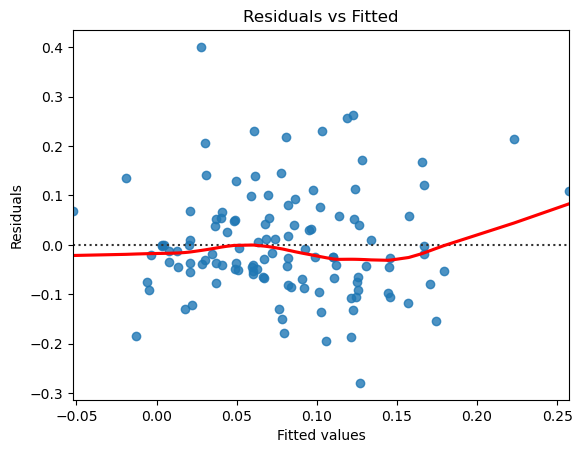

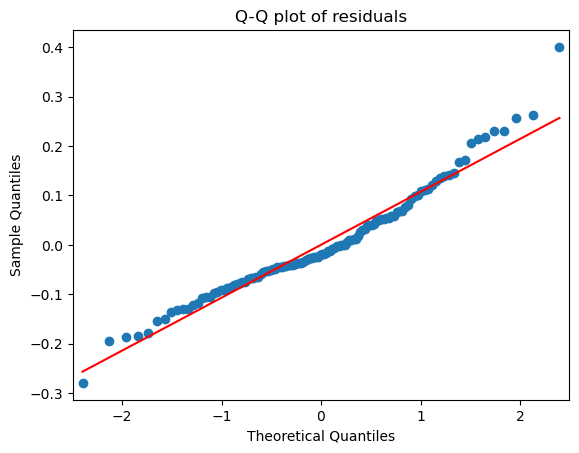

Variance Inflation Factors:
                                              Feature        VIF
0                                           Intercept  42.722032
1              Mean_Sentiment_Score_standard_centered   1.429374
2                              PE_VC_backing_centered   1.490427
3                         Underwriter_Rating_centered   2.034333
4                                 Log_of_Age_centered   1.485461
5                       IPO_Issue_Size_Clean_centered   1.960259
6                                        FTSE_100_IVI   1.207201
7                                    Technology_Dummy   1.577070
8                                    Healthcare_Dummy   1.779130
9                              Energy_Utilities_Dummy   1.500121
10                              Basic_Materials_Dummy   2.053460
11                                  Industrials_Dummy   1.644073
12                                     Consumer_Dummy   1.869747
13                                   RealEstate_Dummy   1.1268

In [35]:


# 1. Residuals & Fitted
fitted_vals = robust_model.fittedvalues
residuals = robust_model.resid

# 2. Linearity & Homoscedasticity
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# 3. Normality of Residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

# 4. Multicollinearity (define X manually)
# Extract design matrix from model
X = robust_model.model.exog
X_names = robust_model.model.exog_names

vif_data = pd.DataFrame()
vif_data['Feature'] = X_names
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)

# 5. Breusch-Pagan Test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X)
print(f"\nBreusch-Pagan p-value: {bp_test[1]:.4f}")
